Loading datasets...

=== Dataset Shapes ===
Customers: (200, 4)
Products: (100, 4)
Transactions: (1000, 7)

=== Sample Data ===

Customers Sample:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

Products Sample:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Sample:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024

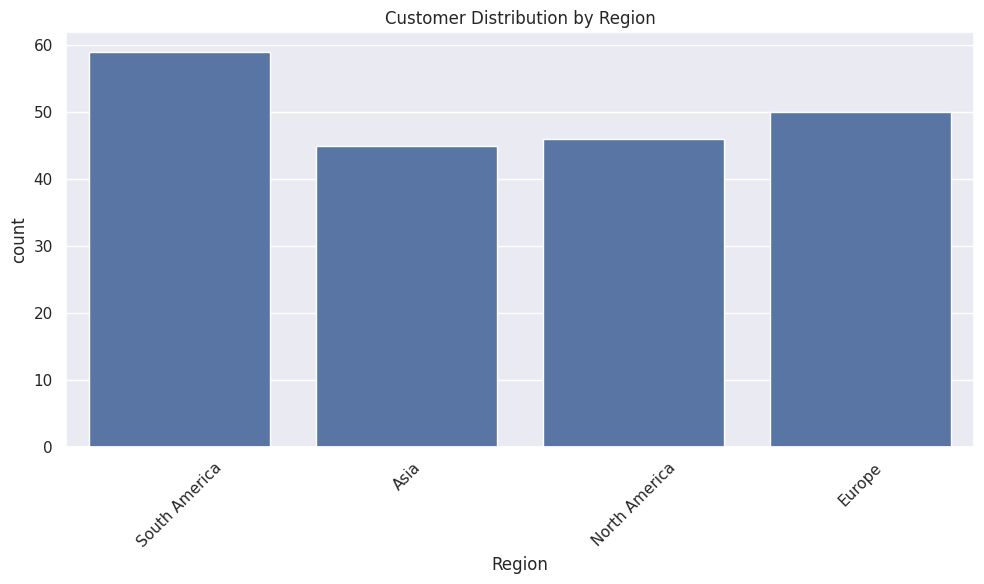

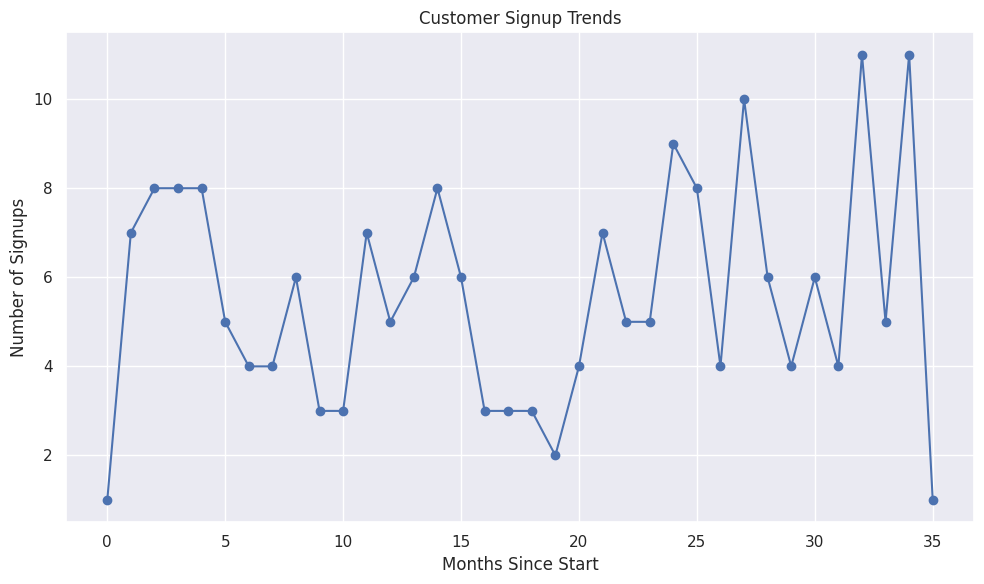


=== Product Analysis ===


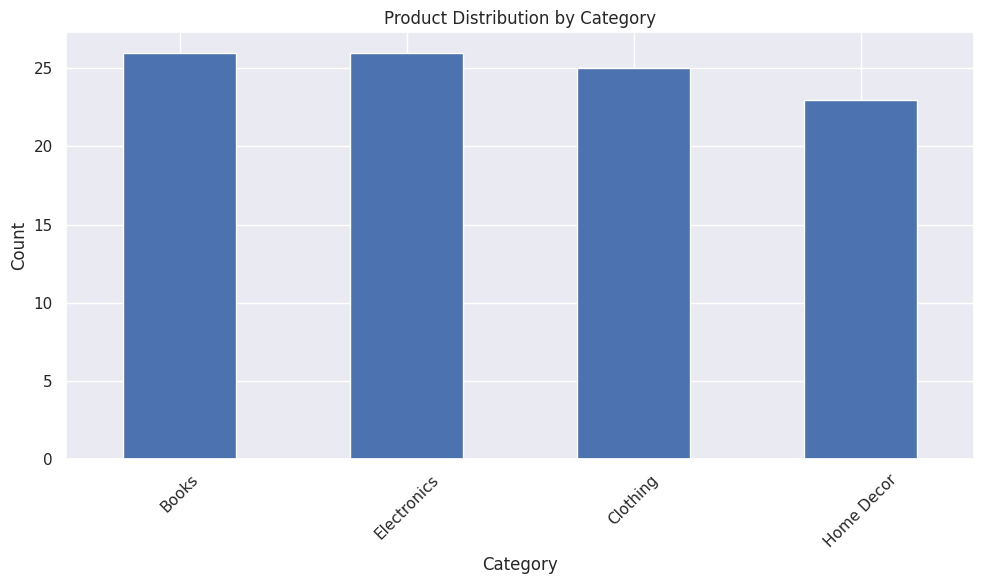

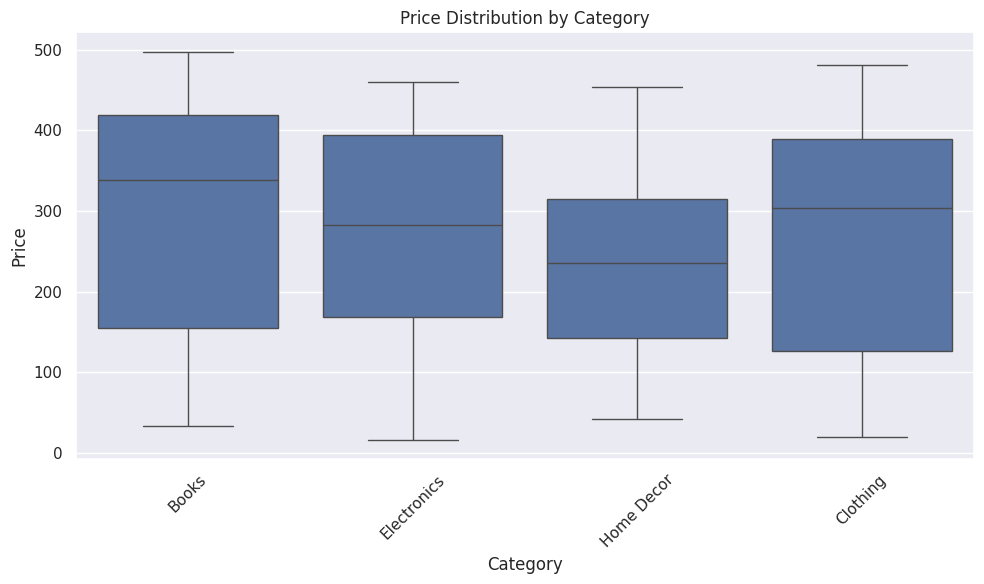


=== Transaction Analysis ===


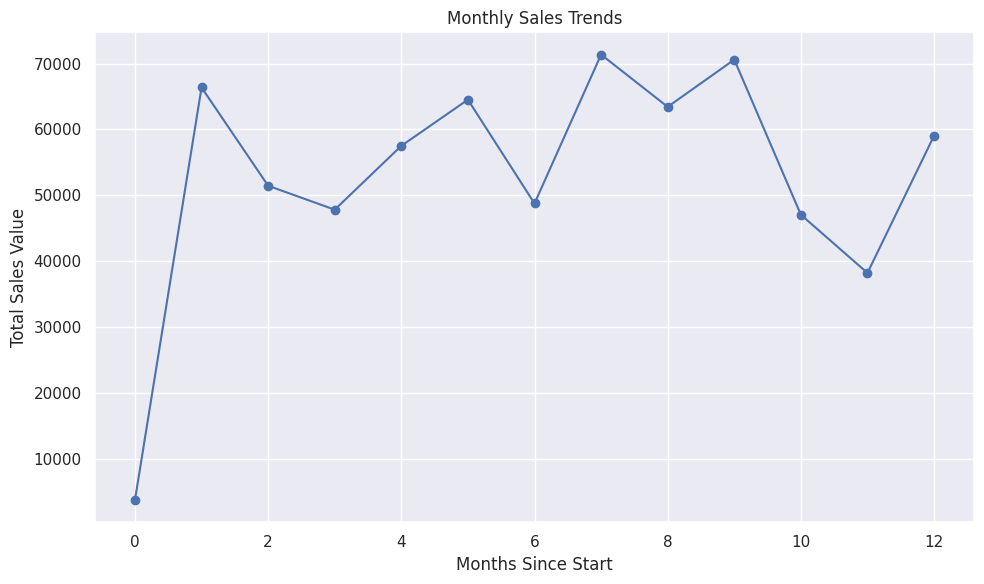


=== Regional Performance ===
               TotalValue  TransactionID  Quantity
Region                                            
Asia            152074.97            218       560
Europe          166254.63            234       595
North America   152313.40            244       593
South America   219352.56            304       789


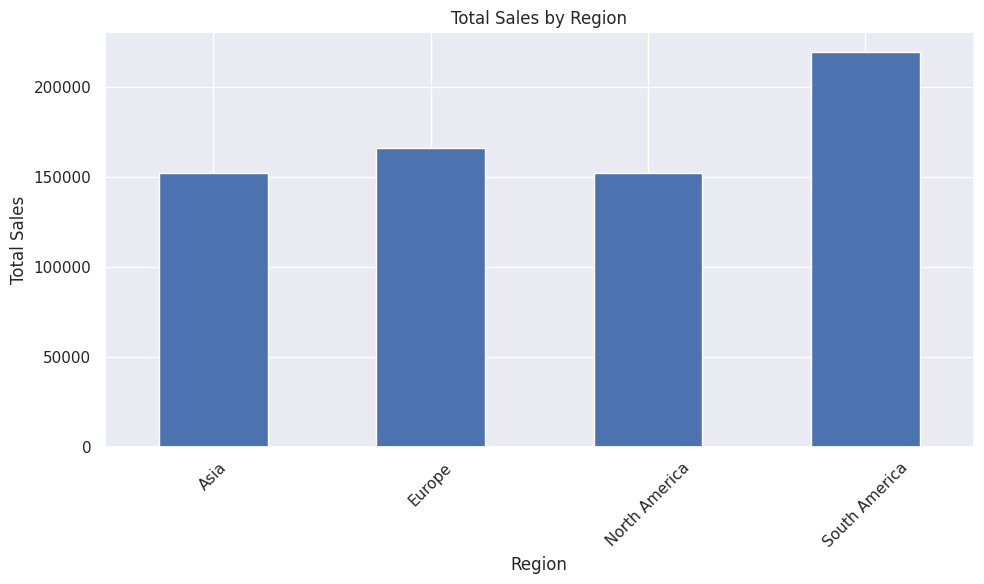


=== Category Performance ===
             TotalValue  Quantity  TransactionID
Category                                        
Books         192147.47       681            270
Clothing      166170.66       590            228
Electronics   180783.50       627            254
Home Decor    150893.93       639            248

=== Customer Metrics Summary ===
       transaction_count   total_spend  total_quantity
count         199.000000    199.000000      199.000000
mean            5.025126   3467.314372       12.748744
std             2.198340   1832.677958        6.151060
min             1.000000     82.360000        1.000000
25%             3.000000   2162.040000        8.500000
50%             5.000000   3137.660000       12.000000
75%             6.000000   4770.225000       17.000000
max            11.000000  10673.870000       32.000000

=== Key Business Metrics ===
Total Revenue: $689,995.56
Total Transactions: 1,000
Average Transaction Value: $690.00
Active Customers: 199
Total P

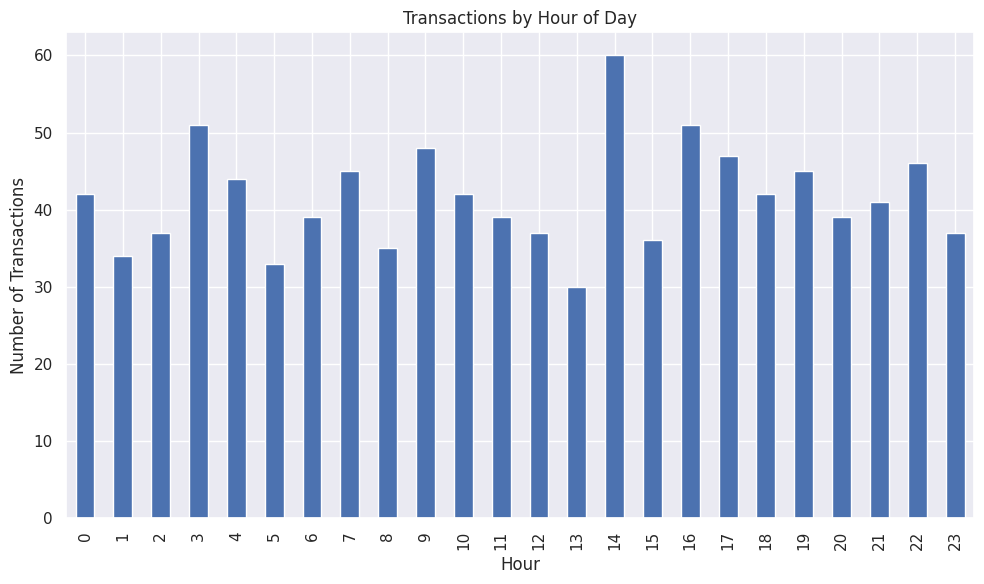

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set basic plot style
sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 6]

# 1. Load the datasets
print("Loading datasets...")
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# 2. Basic Data Overview
print("\n=== Dataset Shapes ===")
print(f"Customers: {customers_df.shape}")
print(f"Products: {products_df.shape}")
print(f"Transactions: {transactions_df.shape}")

# Display sample of each dataset
print("\n=== Sample Data ===")
print("\nCustomers Sample:")
print(customers_df.head())
print("\nProducts Sample:")
print(products_df.head())
print("\nTransactions Sample:")
print(transactions_df.head())

# 3. Customer Analysis
print("\n=== Customer Analysis ===")
plt.figure()
sns.countplot(data=customers_df, x='Region')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Signup trends
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')
monthly_signups = customers_df.groupby('SignupMonth').size().reset_index()
monthly_signups.columns = ['Month', 'Signups']

plt.figure()
plt.plot(range(len(monthly_signups)), monthly_signups['Signups'], marker='o')
plt.title('Customer Signup Trends')
plt.xlabel('Months Since Start')
plt.ylabel('Number of Signups')
plt.tight_layout()
plt.show()

# 4. Product Analysis
print("\n=== Product Analysis ===")
plt.figure()
products_df['Category'].value_counts().plot(kind='bar')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price distribution
plt.figure()
sns.boxplot(data=products_df, x='Category', y='Price')
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Transaction Analysis
print("\n=== Transaction Analysis ===")
# Merge datasets
merged_df = transactions_df.merge(customers_df, on='CustomerID')
merged_df = merged_df.merge(products_df, on='ProductID')

# Monthly sales analysis
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('TransactionMonth')['TotalValue'].sum().reset_index()

plt.figure()
plt.plot(range(len(monthly_sales)), monthly_sales['TotalValue'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Months Since Start')
plt.ylabel('Total Sales Value')
plt.tight_layout()
plt.show()

# 6. Regional Performance
regional_performance = merged_df.groupby('Region').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Quantity': 'sum'
}).round(2)

print("\n=== Regional Performance ===")
print(regional_performance)

plt.figure()
regional_performance['TotalValue'].plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Category Performance
category_performance = merged_df.groupby('Category').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).round(2)

print("\n=== Category Performance ===")
print(category_performance)

# 8. Customer Behavior Analysis
customer_metrics = merged_df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).rename(columns={
    'TransactionID': 'transaction_count',
    'TotalValue': 'total_spend',
    'Quantity': 'total_quantity'
})

print("\n=== Customer Metrics Summary ===")
print(customer_metrics.describe())

# 9. Key Business Metrics
print("\n=== Key Business Metrics ===")
print(f"Total Revenue: ${merged_df['TotalValue'].sum():,.2f}")
print(f"Total Transactions: {len(merged_df):,}")
print(f"Average Transaction Value: ${merged_df['TotalValue'].mean():.2f}")
print(f"Active Customers: {merged_df['CustomerID'].nunique():,}")
print(f"Total Products Sold: {merged_df['Quantity'].sum():,}")

# 10. Time Analysis
merged_df['Hour'] = merged_df['TransactionDate'].dt.hour
merged_df['DayOfWeek'] = merged_df['TransactionDate'].dt.day_name()

plt.figure()
merged_df.groupby('Hour')['TransactionID'].count().plot(kind='bar')
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

# Save key metrics for insights
key_metrics = {
    'total_revenue': merged_df['TotalValue'].sum(),
    'total_transactions': len(merged_df),
    'avg_transaction_value': merged_df['TotalValue'].mean(),
    'active_customers': merged_df['CustomerID'].nunique(),
    'products_sold': merged_df['Quantity'].sum(),
    'regional_performance': regional_performance,
    'category_performance': category_performance,
    'customer_metrics': customer_metrics
}
